In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

cwd = os.getcwd()
print(cwd)

\\ad\ap\homes$\kmp57\My Documents\GitHub\grid-uk-ml\notebooks


In [2]:
path = r"..\data"
filename = "\df_clean.csv"
df = pd.read_csv(path + filename)
#df.reset_index()
df['Datetime'] = pd.to_datetime(df['Datetime'], format="%Y/%m/%d %H:%M:%S")
df = df.set_index("Datetime")
df.head()

,national_demand,pump_demand,demand_forecast,demand_outturn,demand_forecast_publishdate,f01,f02,f03,f04,f05,...,storage_perc,wind_perc,total_wind_power,wind_forecast_publishdate,wind_forecast,temperature_deg,cloudcover_perc,windspeed_kmh,winddirection_degr,import_export_electricity
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-11-01 00:30:00,20724,1476,20370,20530,2021-10-31T08:45:00,0.008494,0.000077,0.000027,1.611739e-05,1.287691e-05,...,0.0,53.8,10267.074,2021-10-31T07:19:46,9176.0,7.1,73,23.7,222.0,1704
2021-11-01 01:00:00,20512,1462,20150,20743,2021-10-31T08:45:00,0.013711,0.000029,0.000008,5.010766e-06,4.228506e-06,...,0.0,54.3,10317.332,2021-10-31T07:19:46,9285.0,7.5,80,24.7,214.0,1361
2021-11-01 01:30:00,19950,1470,19949,20503,2021-10-31T08:45:00,0.010672,0.000016,0.000002,9.573108e-07,7.481108e-07,...,0.0,54.0,10091.954,2021-10-31T07:19:46,9402.0,7.5,80,24.7,214.0,1306
2021-11-01 02:00:00,19277,1414,19553,19924,2021-10-31T08:45:00,0.020586,0.000015,0.000002,9.279950e-07,7.399787e-07,...,0.0,55.0,10187.366,2021-10-31T07:19:46,9525.0,7.7,100,25.6,215.0,340
2021-11-01 02:30:00,18909,1296,19123,19261,2021-10-31T08:45:00,0.005257,0.000020,0.000006,2.867731e-06,2.522290e-06,...,0.0,55.4,10128.426,2021-10-31T07:19:46,9652.0,7.7,100,25.6,215.0,182


### Error Histogram

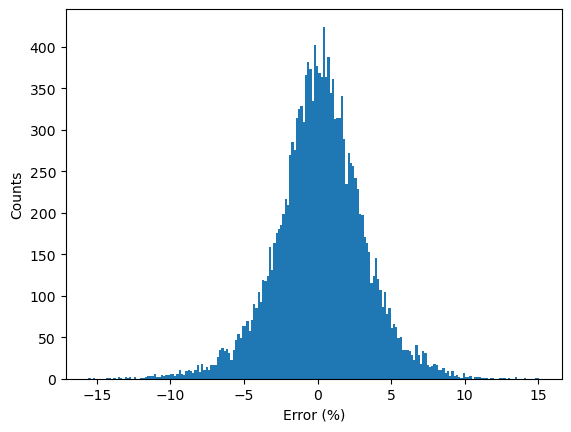

In [3]:
df["demand_forecast_error"] = (df["demand_forecast"] - df["demand_outturn"])/df["national_demand"]*100
df["wind_forecast_error"] = (df["wind_forecast"] - df["total_wind_power"])/df["total_wind_power"]*100

plt.hist(df["demand_forecast_error"], 200)

plt.xlabel("Error (%)")
plt.ylabel("Counts")
plt.savefig('Plots\\error_hist.png')

#plt.plot(df["demand_forecast_error"])

#plt.plot(df["demand_forecast_error"] - abs(df["demand_forecast_error_calc"]))

### Correlation Matrix Across Year

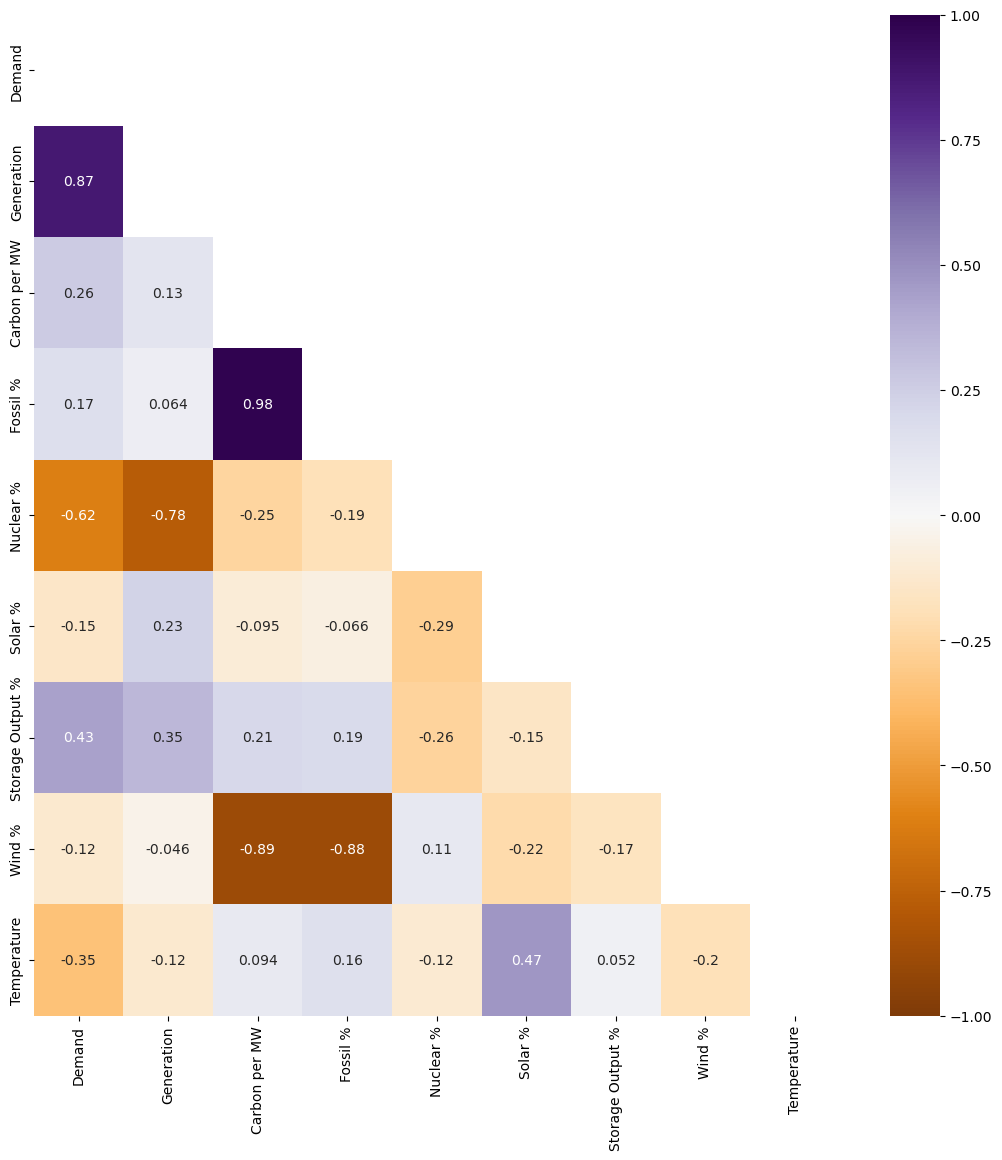

In [4]:
plt.figure(figsize=(13, 13))
corr_columns = ["national_demand","generation","carbon_intensity","fossil_perc",
                "nuclear_perc","solar_perc","storage_perc","wind_perc",
                "temperature_deg"]

labels = ["Demand","Generation","Carbon per MW","Fossil %",
                "Nuclear %","Solar %","Storage Output %","Wind %",
                "Temperature"]

corr_all = df[corr_columns].corr()

mask = np.triu(np.ones_like(corr_all, dtype=bool))

heatmap = sns.heatmap(corr_all,mask = mask, vmin=-1, vmax=1, annot=True, cmap='PuOr',
                      xticklabels = labels,yticklabels = labels)
plt.savefig('Plots\\heatmap.png', dpi=300, bbox_inches='tight')

### Generation by Type

33247.84732014725


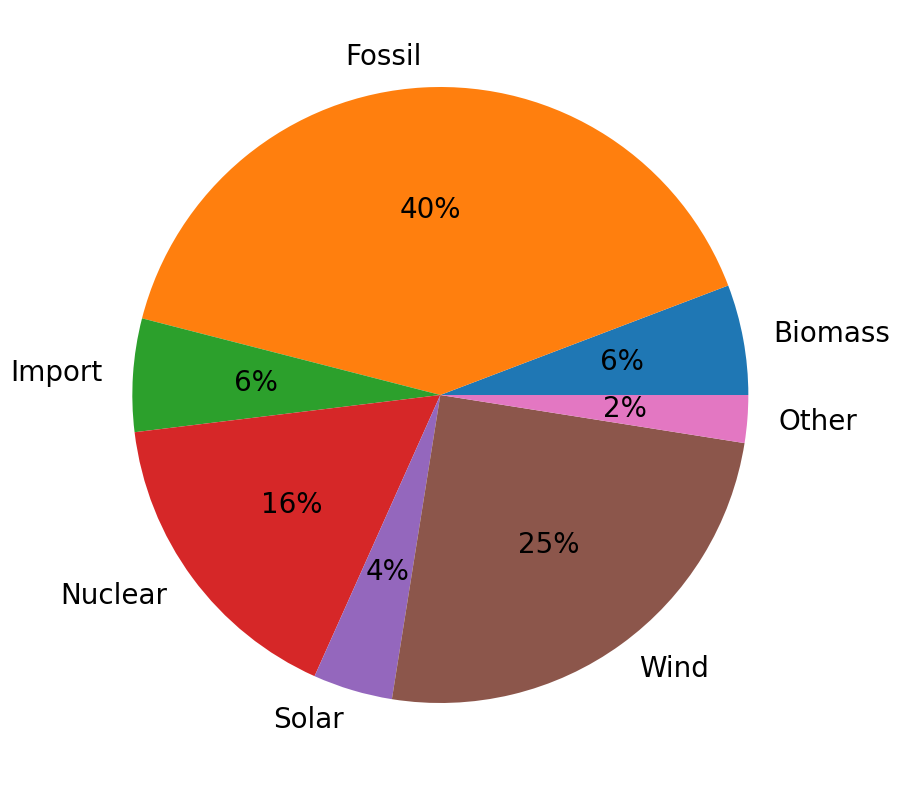

In [5]:
gen_columns = ["biomass_perc",
    "fossil_perc",
    "imports_perc",
    "nuclear_perc",
    "solar_perc",
    "wind_perc"]
gen_labels = ["Biomass",
    "Fossil",
    "Import",
    "Nuclear",
    "Solar",
    "Wind"]

gen_perc = []
for ii in gen_columns:
    gen_perc.append(df[ii].sum())

# Combine small contributors into ther
other_columns = ["hydro_perc",
    "other_perc",
    "storage_perc"]
other_labels = ["Hydro",
    "Solar",
    "Stored"]

other_perc = []
for ii in other_columns:
    other_perc.append(df[ii].sum())
other_perc = sum(other_perc)    

gen_perc.append(other_perc)
gen_labels.append("Other")

explode = (0,0,0,0,0,0,0)


    
plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = 20
plt.pie(gen_perc,labels = gen_labels, explode = explode,autopct='%1.0f%%')
plt.savefig('Plots\\gen_type.png', dpi=300, bbox_inches='tight')
print(df["generation"].mean())

### Generation by Type at night

26605.943113772457


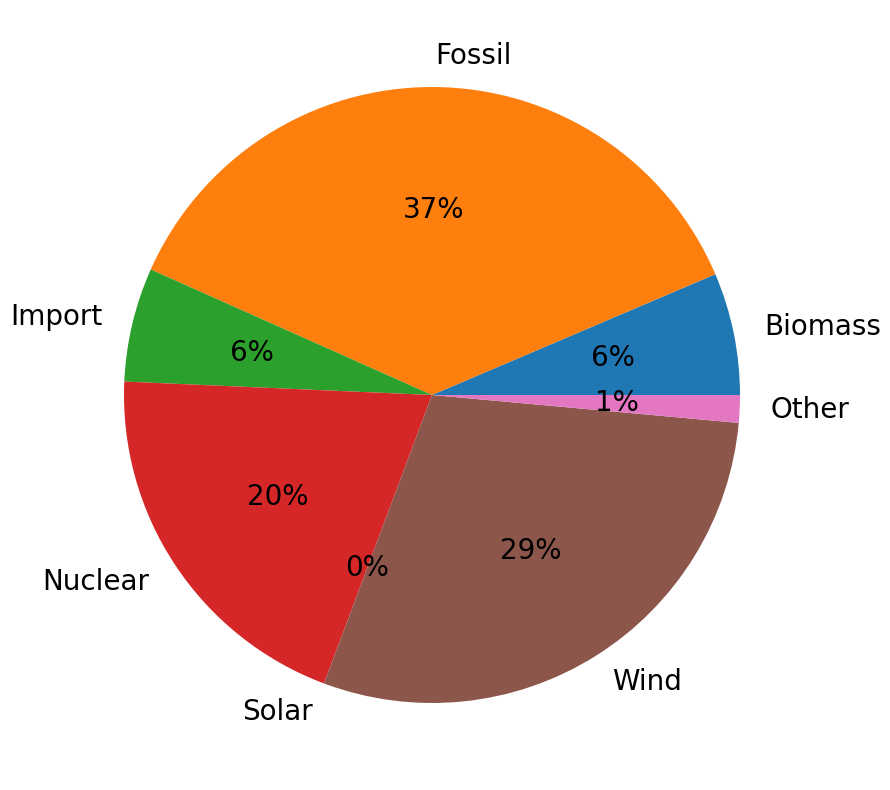

In [6]:
start_time = '02:30'
end_time = '03:00'
# print(df.between_time('20:00','06:00'))


gen_perc = []
for ii in gen_columns:
    gen_perc.append(df[ii].between_time(start_time,end_time).sum())

other_perc = []
for ii in other_columns:
    other_perc.append(df[ii].between_time(start_time,end_time).sum())
other_perc = sum(other_perc)    

gen_perc.append(other_perc)

explode = (0,0,0,0,0,0,0)

plt.figure(figsize=(10, 10))  
plt.rcParams['font.size'] = 20
plt.pie(gen_perc,labels = gen_labels, explode = explode,autopct='%1.0f%%')
plt.savefig('Plots\\gen_type_night.png', dpi=300, bbox_inches='tight')
print(df["generation"].between_time(start_time,end_time).mean())